In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


In [2]:
df = pd.read_csv("cars_price.csv")

In [3]:
df.head()

,Unnamed: 0,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
0,0,honda,accord,565,1993,with mileage,960015.0,petrol,2000.0,black,mechanics,front-wheel drive,D
1,1,ford,fusion,5550,2008,with mileage,172000.0,diesel,1400.0,silver,mechanics,front-wheel drive,M
2,2,nissan,teana,8300,2008,with mileage,223000.0,petrol,2500.0,purple,auto,front-wheel drive,D
3,3,volkswagen,fox,3300,2005,with mileage,140000.0,petrol,1200.0,blue,mechanics,front-wheel drive,A
4,4,nissan,primera,2450,2002,with damage,413000.0,diesel,2200.0,burgundy,mechanics,front-wheel drive,D


In [4]:
df.isna().sum()

Unnamed: 0                0
make                      0
model                     0
priceUSD                  0
year                      0
condition                 0
mileage(kilometers)       0
fuel_type                 0
volume(cm3)              30
color                     0
transmission              0
drive_unit             1345
segment                3755
dtype: int64

In [5]:
df['volume(cm3)'].fillna(df['volume(cm3)'].median(),inplace=True)

In [6]:
df.drop(['segment'],axis=1,inplace=True)

In [7]:
# df.dropna(inplace=True,how='any',axis=0)
df = df.replace(np.inf, np.nan).replace(-np.inf, np.nan).dropna()

In [8]:
df.isna().sum()

Unnamed: 0             0
make                   0
model                  0
priceUSD               0
year                   0
condition              0
mileage(kilometers)    0
fuel_type              0
volume(cm3)            0
color                  0
transmission           0
drive_unit             0
dtype: int64

In [9]:
df.shape

(38655, 12)

In [10]:
# def new_col(x):
#     y = 2020-x
#     return (x+y)

In [11]:
# df['newcol']=df['year'].map(lambda x:new_col(x))

In [12]:
# df['year']=pd.to_datetime(df['year'])
# df['newcol']=pd.to_datetime(df['newcol'])
# df["year"]=(df["newcol"]-df['year']).dt.total_seconds() 

In [13]:
df.head()

,Unnamed: 0,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit
0,0,honda,accord,565,1993,with mileage,960015.0,petrol,2000.0,black,mechanics,front-wheel drive
1,1,ford,fusion,5550,2008,with mileage,172000.0,diesel,1400.0,silver,mechanics,front-wheel drive
2,2,nissan,teana,8300,2008,with mileage,223000.0,petrol,2500.0,purple,auto,front-wheel drive
3,3,volkswagen,fox,3300,2005,with mileage,140000.0,petrol,1200.0,blue,mechanics,front-wheel drive
4,4,nissan,primera,2450,2002,with damage,413000.0,diesel,2200.0,burgundy,mechanics,front-wheel drive


# Exploratory Data Analysis


In [14]:
len(df.make.unique())

93

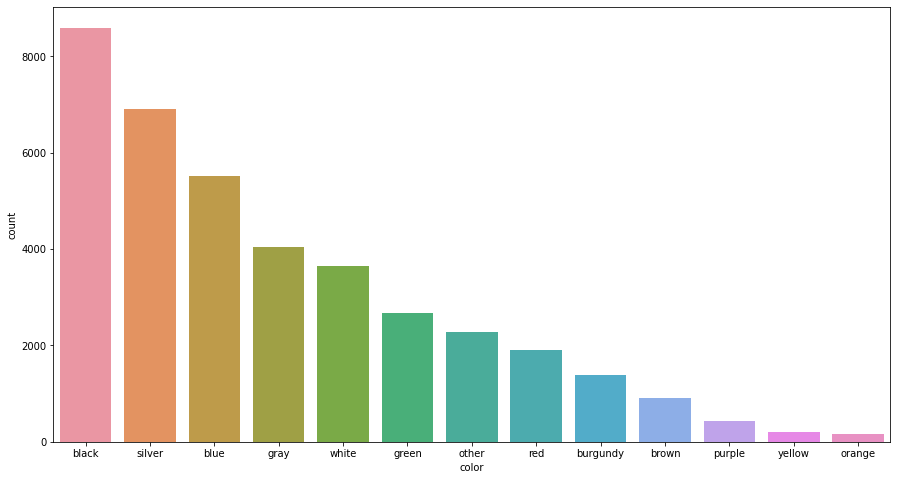

In [15]:
plt.figure(figsize=(15,8))
sns.countplot(data = df, x="color",order = df['color'].value_counts().index)

 black,silver and blue color cars are mostly bought compared to other colors

[Text(0, 0.5, 'count'), Text(0.5, 0, 'transmission_type')]

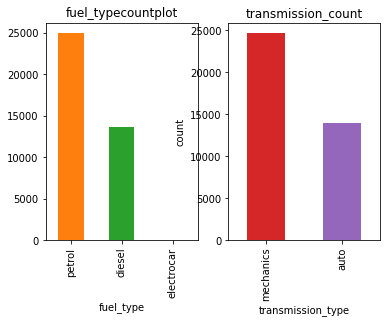

In [16]:
plt.subplot(1,2,1)
plt1 = df.fuel_type.value_counts().plot('bar',color=['C1','C2'])
plt.title("fuel_typecountplot")
plt1.set(xlabel="fuel_type")
plt.subplot(1,2,2)
plt1 = df.transmission.value_counts().plot('bar',color=['C3','C4'])
plt.title("transmission_count")
plt1.set(xlabel='transmission_type',ylabel='count')

petrol type are most prefered than disel and electrocars are rarely bought


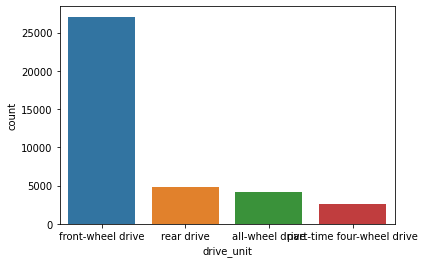

In [17]:
sns.countplot(data = df, x="drive_unit",order = df['drive_unit'].value_counts().index)

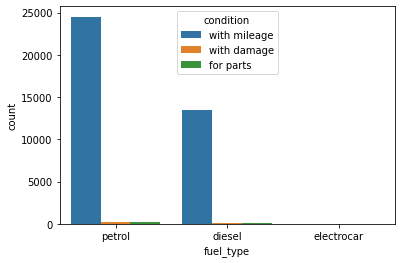

In [18]:
sns.countplot(x='fuel_type', hue='condition', data=df)

            petrol and disel with_milage are sold more

In [19]:
df.make.value_counts()[:15].sum()

30521

In [20]:
maps=['C0','C1','C2','C3','C4','C5','C6','C7','C8','C9','C10']

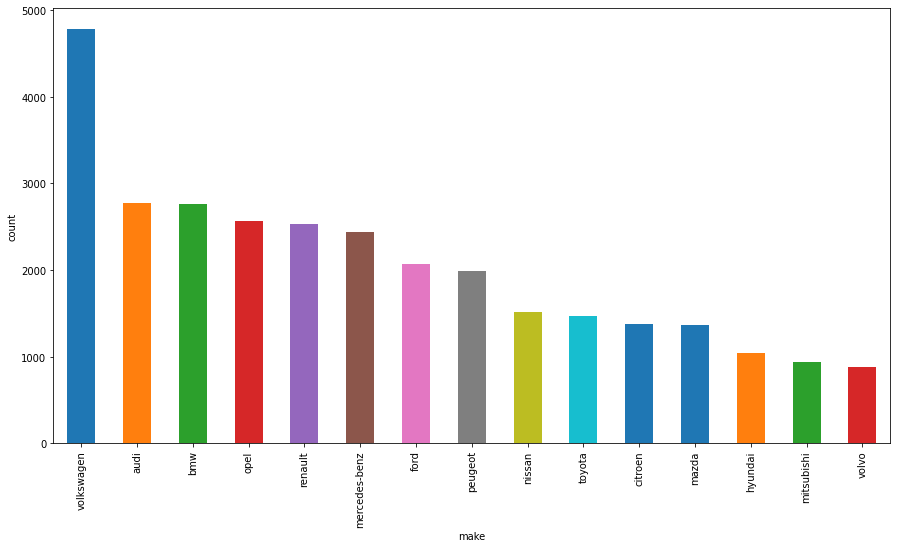

In [21]:
plt.figure(figsize=(15,8))
plt.xlabel("make")
plt.ylabel("count")
df.make.value_counts()[:15].plot(kind='bar',color=maps)

these are top 15 most purchased car companies 
volkswagan is most_purchased car following audi,bmw

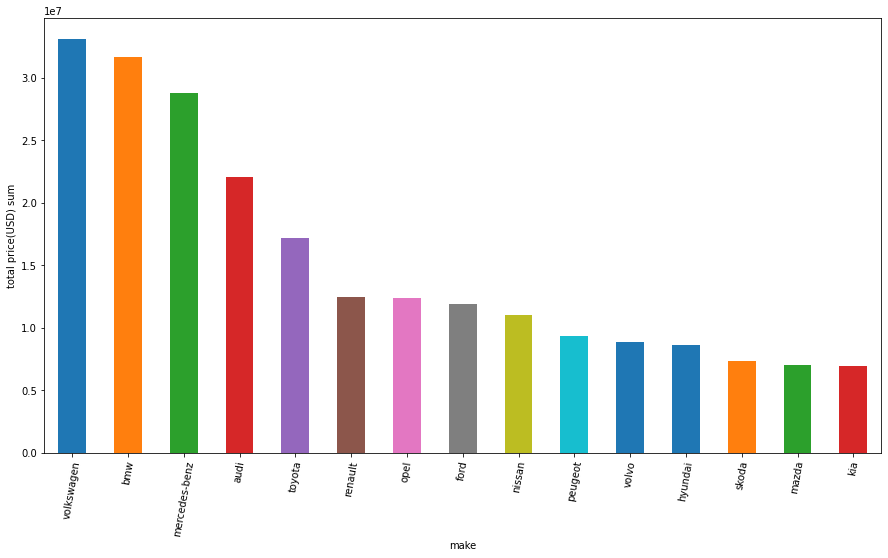

In [22]:
plt.figure(figsize=(15,8))
plt.ylabel("total price(USD) sum")
df.groupby('make')['priceUSD'].sum().sort_values(ascending=False)[:15].plot('bar',rot=80,color=maps)

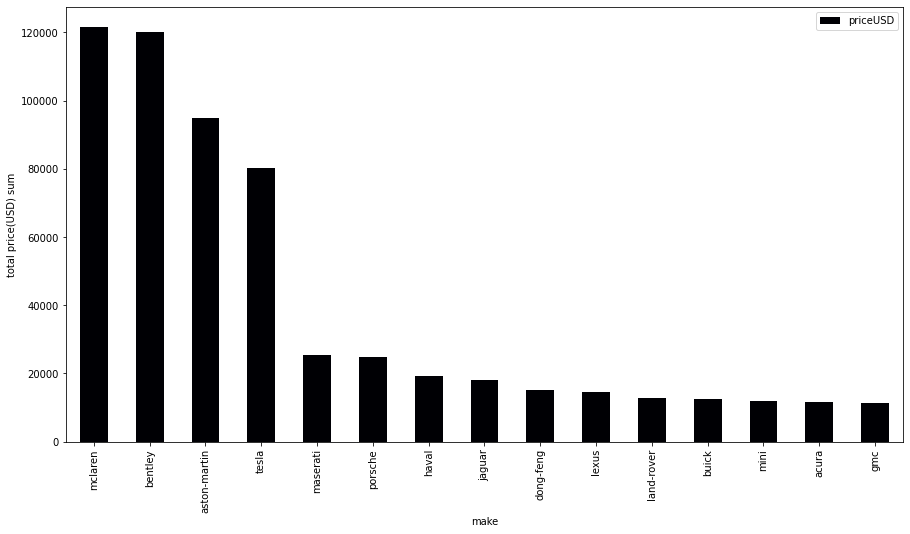

In [23]:
plt.figure(figsize=(15,8))
plt.ylabel("total price(USD) sum")
df.groupby('make')['priceUSD'].median().sort_values(ascending=False)[:15].plot('bar',colormap='inferno',legend=True)

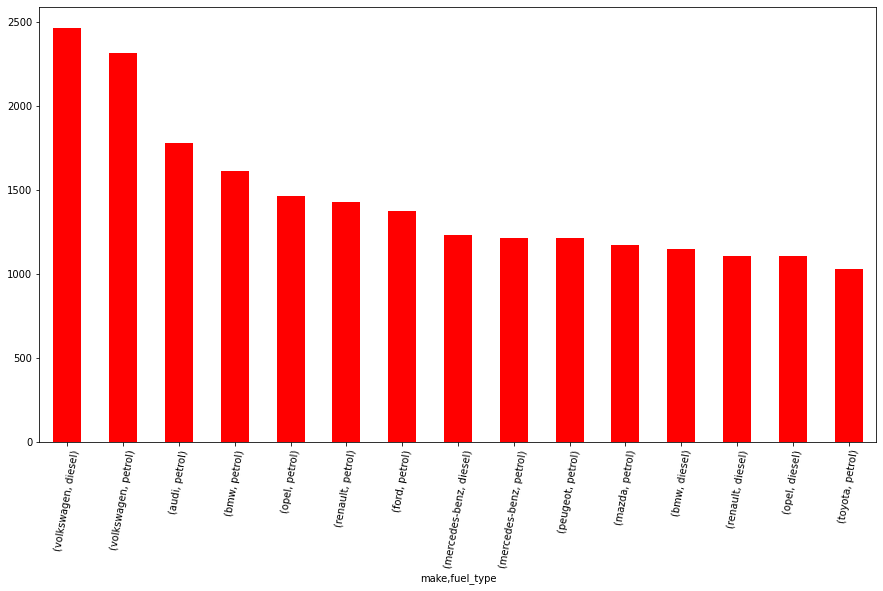

In [24]:
plt.figure(figsize=(15,8))
df.groupby(['make','fuel_type'])['priceUSD'].count().sort_values(ascending=False)[:15].plot('bar',colormap='prism',rot=80)

In [25]:
df.groupby('make')['priceUSD'].median()

make
acura           11500.0
alfa-romeo       2200.0
aro              3000.0
aston-martin    95000.0
audi             5775.0
                 ...   
volvo            8100.0
vortex           5500.0
wartburg         1000.0
zaz               575.0
zotye            9499.5
Name: priceUSD, Length: 93, dtype: float64

In [26]:

# make_median =dict(df.groupby('make')['priceUSD'].median())
# df['make'].replace(make_median ,inplace=True)

In [27]:
# plt.scatter(df['make'],df['priceUSD'])

In [28]:
# df['make'] = df['make'].map(lambda x: (math.log(x)))

In [29]:
# plt.scatter(df['make'],df['priceUSD'])

Text(0, 0.5, 'price')

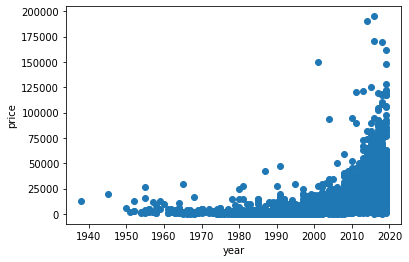

In [30]:
plt.scatter(df['year'],df['priceUSD'])
plt.xlabel("year")
plt.ylabel('price')

In [31]:
# df['volume(cm3)'] = df['volume(cm3)'].map(lambda x: (math.log(x)))

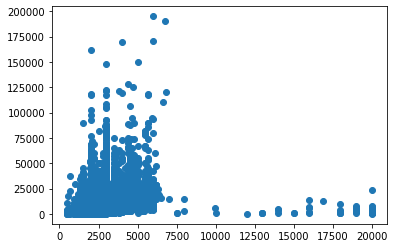

In [32]:
plt.scatter(df['volume(cm3)'],df['priceUSD'])

In [33]:
# labelencoding based on the count
def label_encoding(column):
    cat_feature_value_counts = column.value_counts()
    value_counts_list = cat_feature_value_counts.index.tolist()
    value_counts_range = list(reversed(range(1,len(cat_feature_value_counts)+1)))
    encoder_list_range = dict(zip(value_counts_list,value_counts_range))
    column = column.map(encoder_list_range)
    return column
    

In [34]:
df['color'] = label_encoding(df['color'])
df['make'] = label_encoding(df['make'])
df['drive_unit']=label_encoding(df['drive_unit'])
df['condition']=label_encoding(df['condition'])

In [35]:
df.drop(['Unnamed: 0','model'],axis=1,inplace=True)

In [36]:
df =pd.get_dummies(df,drop_first=True)

In [37]:
#calculating corelation
core = df.corr().abs()
core

,make,priceUSD,year,condition,mileage(kilometers),volume(cm3),color,drive_unit,fuel_type_electrocar,fuel_type_petrol,transmission_mechanics
make,1.000000,0.035248,0.060599,0.013879,0.080261,0.031125,0.069014,0.144152,0.040245,0.194991,0.056047
priceUSD,0.035248,1.000000,0.609118,0.086811,0.172291,0.272806,0.116247,0.377636,0.099432,0.102573,0.447860
year,0.060599,0.609118,1.000000,0.125338,0.237243,0.026321,0.159972,0.140130,0.036050,0.066184,0.394934
condition,0.013879,0.086811,0.125338,1.000000,0.040420,0.026017,0.042975,0.030493,0.003282,0.030952,0.057073
mileage(kilometers),0.080261,0.172291,0.237243,0.040420,1.000000,0.015293,0.016909,0.056106,0.014170,0.089205,0.105236
volume(cm3),0.031125,0.272806,0.026321,0.026017,0.015293,1.000000,0.106330,0.407125,0.003267,0.038615,0.354836
color,0.069014,0.116247,0.159972,0.042975,0.016909,0.106330,1.000000,0.087801,0.003231,0.102963,0.124041
drive_unit,0.144152,0.377636,0.140130,0.030493,0.056106,0.407125,0.087801,1.000000,0.005361,0.028472,0.400920
fuel_type_electrocar,0.040245,0.099432,0.036050,0.003282,0.014170,0.003267,0.003231,0.005361,1.000000,0.037000,0.034408
fuel_type_petrol,0.194991,0.102573,0.066184,0.030952,0.089205,0.038615,0.102963,0.028472,0.037000,1.000000,0.103600


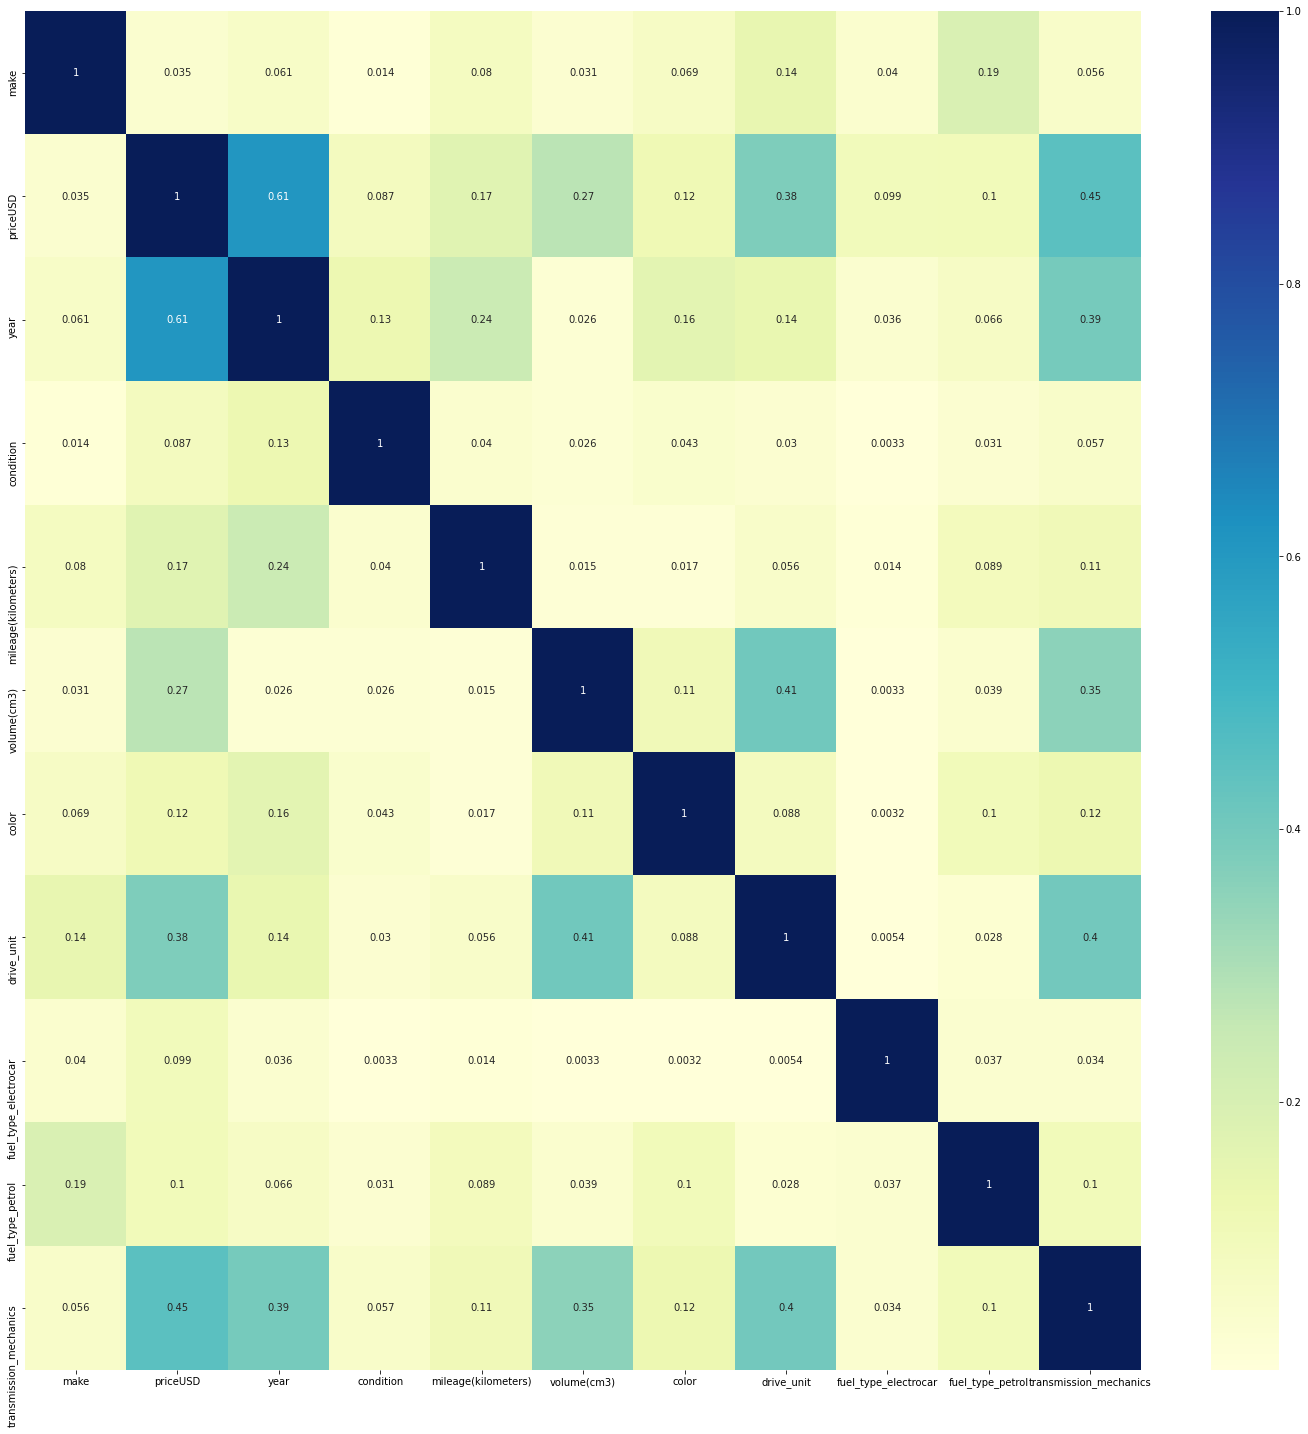

In [38]:
plt.figure(figsize=(25,25))
sns.heatmap(core,cmap="YlGnBu", annot=True)
plt.show()

# handling outliers

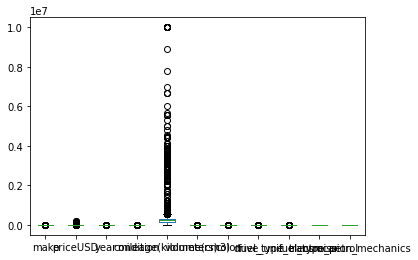

In [39]:
df.plot(kind='box')
plt.show()

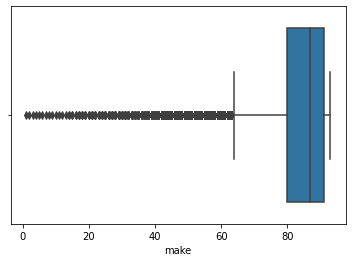

In [40]:
sns.boxplot(x='make',data=df)


In [41]:
df.describe()

,make,priceUSD,year,condition,mileage(kilometers),volume(cm3),color,drive_unit,fuel_type_electrocar,fuel_type_petrol,transmission_mechanics
count,38655.000000,38655.000000,38655.000000,38655.000000,3.865500e+04,38655.000000,38655.000000,38655.000000,38655.00000,38655.000000,38655.000000
mean,83.734135,7481.318251,2003.548907,2.976665,2.436653e+05,2106.167068,10.081749,3.458052,0.00075,0.645816,0.637977
std,10.172729,8376.403819,8.074797,0.194810,3.178598e+05,932.252270,2.740118,0.931277,0.02738,0.478272,0.480592
min,1.000000,95.000000,1938.000000,1.000000,0.000000e+00,500.000000,1.000000,1.000000,0.00000,0.000000,0.000000
25%,80.000000,2400.000000,1998.000000,3.000000,1.379740e+05,1600.000000,8.000000,3.000000,0.00000,0.000000,0.000000
50%,87.000000,5400.000000,2004.000000,3.000000,2.290000e+05,1999.000000,11.000000,4.000000,0.00000,1.000000,1.000000
75%,91.000000,9900.000000,2010.000000,3.000000,3.090000e+05,2300.000000,12.000000,4.000000,0.00000,1.000000,1.000000
max,93.000000,195000.000000,2019.000000,3.000000,9.999999e+06,20000.000000,13.000000,4.000000,1.00000,1.000000,1.000000


In [42]:
from scipy import stats
z = np.abs(stats.zscore(df))


In [43]:
df.shape

(38655, 11)

In [44]:
print(np.where(z > 3))

(array([    4,    12,    13, ..., 38629, 38629, 38653], dtype=int64), array([3, 1, 3, ..., 1, 5, 0], dtype=int64))


In [45]:
df = df[(z <= 3).all(axis=1)]
df.shape

(35856, 11)

In [46]:
df.head()

,make,priceUSD,year,condition,mileage(kilometers),volume(cm3),color,drive_unit,fuel_type_electrocar,fuel_type_petrol,transmission_mechanics
0,74,565,1993,3,960015.0,2000.0,13,4,0,1,1
1,87,5550,2008,3,172000.0,1400.0,12,4,0,0,1
2,85,8300,2008,3,223000.0,2500.0,3,4,0,1,0
3,93,3300,2005,3,140000.0,1200.0,11,4,0,1,1
5,85,18900,2016,3,148000.0,1600.0,13,4,0,0,1


In [47]:
# Q1 = df.quantile(0.25)
# Q3 = df.quantile(0.75)
# IQR = Q3 - Q1
# print(IQR)
# df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

# training and testing different models 

In [48]:
cols = df.columns
scaler = StandardScaler()
df =pd.DataFrame(scaler.fit_transform(df),columns=cols)
df.head()


,make,priceUSD,year,condition,mileage(kilometers),volume(cm3),color,drive_unit,fuel_type_electrocar,fuel_type_petrol,transmission_mechanics
0,-1.358874,-1.103907,-1.397660,0.0,5.667970,-0.069111,1.074542,0.555455,0.0,0.756132,0.737329
1,0.279934,-0.228799,0.585454,0.0,-0.468271,-1.029797,0.699332,0.555455,0.0,-1.322521,0.737329
2,0.027810,0.253959,0.585454,0.0,-0.071136,0.731461,-2.677554,0.555455,0.0,0.756132,-1.356246
3,1.036307,-0.623782,0.188832,0.0,-0.717453,-1.350025,0.324123,0.555455,0.0,0.756132,0.737329
4,0.027810,2.114770,1.643115,0.0,-0.655158,-0.709568,1.074542,0.555455,0.0,-1.322521,0.737329


In [49]:
x = df.drop(['priceUSD'],axis=1)
y = df['priceUSD']

In [50]:
x.shape

(35856, 10)

In [51]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [52]:
from sklearn.metrics import r2_score
from sklearn.model_selection import ShuffleSplit, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR

In [53]:
#defining function to get r2score
def r2score(model,X,y):
    cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
    r2scores = cross_val_score(model,x_train,y_train,cv = cv,scoring = 'r2')
    return(r2scores.mean())
    

In [54]:
#rootmeansquareerror
def rmse(model,x,y):
    cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
    rmse = -cross_val_score(model,x_train,y_train,cv = cv,scoring = 'neg_mean_squared_error')
    return(np.sqrt(rmse.mean()))

# linear regression

In [55]:
try:
    lr = LinearRegression()
    r2_lr=r2score(lr,x_train,y_train)
    rmse_lr = rmse(lr,x_train,y_train)
except:
    r2_lr=r2score(lr,x_train,y_train)
    rmse_lr = rmse(lr,x_train,y_train)

In [56]:
print("the r2_score on cross_validation",r2_lr)
print("the rmse_score on cross_validation",rmse_lr)

the r2_score on cross_validation 0.718727399083489
the rmse_score on cross_validation 0.526184201648884


In [57]:
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
print("the r2 on test",r2_score(y_test,y_pred))
print("the rmse on teat",np.sqrt(mean_squared_error(y_test,y_pred)))

the r2 on test 0.7291099704634678
the rmse on teat 0.5247527125033994


# support vector regressor

In [58]:
svr = SVR( gamma='auto')
r2_svr=r2score(svr,x_train,y_train)
rmse_svr = rmse(svr,x_train,y_train)

In [59]:
print("the r2_score on cross_validation",r2_svr)
print("the rmse_score on cross_validation",rmse_svr)

the r2_score on cross_validation 0.8712538969911099
the rmse_score on cross_validation 0.35602287080770345


In [60]:
# param_grid = {'C':[0.001,0.1,1,10],'gamma':[1,0.1,0.01,0.001] ,'kernel':['rbf']}
# from sklearn.model_selection import RandomizedSearchCV
# clf = RandomizedSearchCV(svr,param_grid,n_jobs=-1,verbose=4,cv=3,scoring = 'r2')


In [61]:
# clf.fit(x_train,y_train)


In [62]:
svr.fit(x_train,y_train)
y_pred = svr.predict(x_test)
print("the r2 on test",r2_score(y_test,y_pred))
print("the rmse on test",np.sqrt(mean_squared_error(y_test,y_pred)))

the r2 on test 0.8805299914130671
the rmse on test 0.3484878406102453


# decesion tree regressor

In [63]:
dtr = DecisionTreeRegressor(random_state=100)
r2_dtr=r2score(dtr,x_train,y_train)
rmse_dtr = rmse(dtr,x_train,y_train)
print("the r2_score on cross_validation",r2_dtr)
print("the rmse_score on cross_validation",rmse_dtr)


the r2_score on cross_validation 0.8117913681987554
the rmse_score on cross_validation 0.4303950726392121


In [64]:
dtr.fit(x_train,y_train)
y_pred = dtr.predict(x_test)
print("the r2 on test",r2_score(y_test,y_pred))
print("the rmse on test",np.sqrt(mean_squared_error(y_test,y_pred)))

the r2 on test 0.8348326985773026
the rmse on test 0.4097511852364823


# random forest regressor

In [65]:
rfr = RandomForestRegressor(random_state=42,bootstrap=True,n_estimators=50,max_features='log2')
r2_rfr=r2score(rfr,x_train,y_train)
rmse_rfr = rmse(rfr,x_train,y_train)
print("the r2_score on cross_validation",r2_rfr)
print("the rmse_score on cross_validation",rmse_rfr)

the r2_score on cross_validation 0.8949005324352852
the rmse_score on cross_validation 0.32172150987731885


In [66]:
rfr.fit(x_train,y_train)
y_pred = rfr.predict(x_test)
print("the r2 on test",r2_score(y_test,y_pred))
print("the rmse on test",np.sqrt(mean_squared_error(y_test,y_pred)))


the r2 on test 0.9069514767573721
the rmse on test 0.3075480121976243
